# Multiple Linear Regression


### Import required packages

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from dmba import regressionSummary

## Code

In [ ]:
print("hello")

```{toggle}
```{code-block}
print('hello')
```


In [ ]:
#Import data
df = pd.read_csv("./data/ToyotaCorolla.csv")

In [2]:
#Creating X and Y
X = df.drop('Price',axis = 1)
Y = df.Price

#Encoding variables
X = pd.get_dummies(X,drop_first = False)

#Partition
train_x,test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.4, random_state = 2012)

In [5]:
car_lm = LinearRegression()

car_lm.fit(train_x, train_y)

print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

intercept  -356281157835.0807
        Predictor   coefficient
0              Id -1.044232e+00
1       Age_08_04  1.480982e+07
2       Mfg_Month  1.480982e+07
3        Mfg_Year  1.777186e+08
4              KM -1.938983e-02
..            ...           ...
415     Color_Red  2.436955e+02
416  Color_Silver  3.228589e+02
417  Color_Violet -5.462506e+02
418   Color_White  3.329674e+02
419  Color_Yellow -3.430901e+02

[420 rows x 2 columns]


In [6]:
regressionSummary(train_y, car_lm.predict(train_x))
print()
regressionSummary(test_y, car_lm.predict(test_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 637.6398
            Mean Absolute Error (MAE) : 442.2569
          Mean Percentage Error (MPE) : -0.4488
Mean Absolute Percentage Error (MAPE) : 4.6432


Regression statistics

                      Mean Error (ME) : -541.1156
       Root Mean Squared Error (RMSE) : 5093.9109
            Mean Absolute Error (MAE) : 1863.5874
          Mean Percentage Error (MPE) : -6.1678
Mean Absolute Percentage Error (MAPE) : 17.7818


In [8]:
car_lm_pred = car_lm.predict(test_x) # Which data set are we calculating predictions
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': test_y,'Error': test_y - car_lm_pred})
result.head(20)

,Predicted,Actual,Error
1104,7377.593628,7250,-127.593628
309,12592.718018,12450,-142.718018
1201,7396.279663,7850,453.720337
1169,8592.765747,9250,657.234253
101,16091.422607,16250,158.577393
916,8437.802612,7950,-487.802612
600,9217.399963,11250,2032.600037
266,12990.992126,12495,-495.992126
863,8935.317749,8200,-735.317749
940,10643.601868,9450,-1193.601868


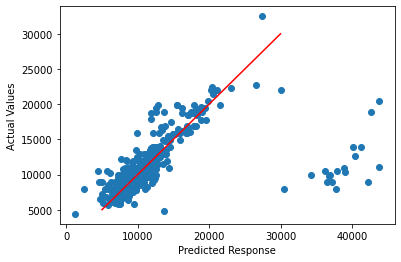

In [9]:
#Plotting Actual Vs Predicted
plt.scatter(result.Predicted,result.Actual)
plt.xlabel("Predicted Response")
plt.ylabel("Actual Values")
plt.plot( [5000,30000],[5000,30000],color="red" )

## Chapter Introduction
In the previous chapter, we discussed similarity and clustering as a data pre-processing step. It is an important organizational step that helps analyze the data as a whole before moving into regression analysis and identifying the direct impact of certain variables on others. In this chapter, we’ll go over the basics of that regression analysis, focusing on one of the most popular models for making predictions when we have a numerical outcome variable, Multiple Linear Regression (MLR). 

In this chapter, we’ll go over: 
1. What is MLR?
2. Assumptions behind MLR
3. Steps to MLR
4. MLR + Predictions

### What is MLR
Recall from Chapter 2 that data mining methods fall under two main categories: supervised learning and unsupervised learning. These learning methods are classified based on the presence and type of outcome variable; in supervised learning, we predict a previously determined outcome variable, and in unsupervised learning, we identify patterns within the data. Under unsupervised learning, the main method we’ll cover in this class is clustering, and under supervised learning, the two branches we’ll cover are regression and classification.

The goal of Regression is to predict numerical outcomes and can be used to predict values in various situations. For example, predicting the amount spent on a fraudulent transaction would be a regression problem.

Regression can be used for explanatory or predictive modeling.

Explanatory Modeling - Creating a model that fits well with existing data (the data on which it was trained)
Uses the entire data set to maximize information and focus on the coefficients
Represents the relationship between existing dependent and independent variables, not predicting new values for dependent variables

Predictive Modeling – Creating a model that has high predictive accuracy on new data
Partitions to assess predictive performance and avoids overfitting with the focus being on predictions
Accurately predicts new values for dependent variables, not descriptions of associations between existing dependent and independent variables 

The goal of Classification is to predict categorical outcomes, such as whether or not an outcome will be true or the probability that an outcome will occur. Within classification, there are two types of outcomes: class membership and propensity. Class membership refers to the categorical variable itself, while propensity refers to the probability of the class membership. For example, predicting whether or not a transaction is fraudulent would be a classification problem.

Here are some more examples:

How much will a house sell for? - Regression (numerical outcome)

Will a student pass a test or not? - Classification (class membership)

What is the probability of a certain student passing a class? - Classification (propensity)

One method of predicting numerical outcomes under regression is Linear Regression, which examines the relationship between a dependent variable (also referred to as the outcome variable, response, or target) and independent variable(s) (also referred to as the predictor(s), input variable(s), regressor(s), or covariate(s)) assuming a linear relationship. Simple Linear Regression (SLR) examines a single independent variable, while Multiple Linear Regression (MLR) examines multiple independent variables.

The equation below represents a linear relationship between multiple predictors and the outcome. We assume that this is the true relationship between the predictor variables and outcome variable. We will go over some examples and explanations to the different parts of this equation in the rest of this chapter.

y = β0 + β1x1 + β2x2 +⋯+ βpxp + ϵ

y: outcome variable
x1, ..., xp: predictor variables wherewith p is the= total number of predictors
β0: intercept
β1, ..., βp: coefficients with p = total number of predictors
ϵ: error (factors affecting y other than predictors)


Let’s walk through an example of predicting numerical outcomes.

You work at a Toyota dealership which buys back used cars from customers purchasing new cars. To make a profit, the dealership needs to predict the price that the used car will sell for.

| Variable   | Description                           |
|------------|---------------------------------------|
| Price      | Offer price in Euros                  |
| Age        | Age in months as of August 2004       |
| Kilometers | Accumulated Kilometers on odometer    |
| Fuel type  | Fuel type (Petrol, Diesel, CNG)       |
| HP         | Horsepower                            |
| Metallic   | Metallic color (Yes = 1, No= 0)       |
| Automatic  | Automatic (Yes = 1, No = 0)           |
| CC         | Cylinder volume in cubic centimeters  |
| Doors      | Number of doors                       |
| QuartTax   | Quarterly road tax in Euros           |
| Weight     | Weight in Kilograms                   |

Example: 

In this example, a relationship between several variables and price is already given. Later in this chapter, we’ll explore how to get these coefficients through MLR.

Price = 3 - 0.5 Age + 2 Automatic_binary + 3 PowerWindow_binary + 0.4 WarrantyLeft

We can interpret these variables quantitatively and qualitatively. A quantitative interpretation of this equation would state a 1 unit increase in the age of a car reduces price by 0.5 units of price whereas a qualitative interpretation of this equation would simply state an increase in age will reduce the price of the car (without specifying numerical values.)

We will use predictors (x1, ..., xp) to predict (instead of explain) outcome (y).

For example:

Use house characteristics to predict selling price

Use advertising expenditures to predict sales

Use product demand to predict valuation

## Assumptions about MLR

When dealing with multiple linear regression, we must always assume that there is a linear relationship between multiple predictors and the outcome. If a linear relationship is not present, a non-linear regression model must be utilized.

We must also assume independent variables are not highly correlated to one another; this creates the issue of multicollinearity. 

When converting categorical variables to dummy variables, we must drop one dummy variable to avoid multicollinearity. For example, continuing on from the Toyota dealership example, if we were to dummy code the variable Fuel, we would get Fuel_Petrol, Fuel_Diesel, and Fuel_CNG. If Fuel_Patrol and Fuel_Diesel are both 0, then the car in question must run on CNG. Including the variable Fuel_CNG in our model means that any one of the Fuel dummy variables can be determined by the remaining two dummy variables.This is an example of perfect multicollinearity. Therefore, as shownyou see in the image above, Fuel_CNG must be dropped from the model. It doesn’t matter which dummy variable is dropped, as long as one of them is.

By fitting the model to our data, we will estimate the coefficients to the predictor variables and use those to predict outcome values. We can then use those predicted outcome values to calculate residuals (also called errors). Estimates will remain unbiased if the mean of the error term is 0, and if the variance of the error term is constant, or homoskedastic.

## MLR + Prediction

In data mining, predictive accuracy methods indicate high accuracy when applied to new data sets, not existing ones. There are 5 common predictive accuracy methods we will discuss in this chapter. These include Mean Error (ME), Root-Mean-Squared Error (RMSE), Mean Absolute Error (MAE), Mean Percentage Error (MPE), and Mean Absolute Percentage Error (MAPE). 

Mean Absolute Error (MAE): This measure gives the absolute magnitude of the distance between your prediction and the outcome variable. For example, if your MAE is 12, your predictions are on average 12 units off from the actual value. 

Mean Error (ME): This measure gives an indication of whether predictions overpredict or underpredict the outcome variable on average. It is similar to MAE, but does not take the absolute value of the error. A small mean error does NOT indicate good performance, but tells us whether the model consistently over- or underestimates outcomes. 

Root-Mean-Squared Error (RMSE): This measure tells you how concentrated the data is around the line of best fit determined by the regression method. It is similar to the standard error of estimate in linear regression, but computed on the validation data. 

Mean Absolute Percentage Error (MAPE): This measure gives the percentage score of how predictions deviate from the actual values on average. 

Mean Percentage Error (MPE): This measure is similar to MAPE, but does not take the absolute value of the error.